In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Plotter import Plotter
from DataFrameTransform import DataFrameTransform
from DataFrameInfo import DataFrameInfo

df = pd.read_csv('loan_payments3.csv')
graph = Plotter(df)
data = DataFrameInfo()

First, I needed to see the skewness value for every numerical column.

In [63]:
#Skew of int64 data
print(f"{df.select_dtypes(include='int64').skew()}")

id                2.389409
member_id         2.221899
loan_amount       0.796752
delinq_2yrs       5.275737
inq_last_6mths    3.279658
open_accounts     1.058490
total_accounts    0.778410
policy_code       0.000000
dtype: float64


In [64]:
#Skew of float64 data
print(f"{df.select_dtypes(include='float64').skew()}")

funded_amount                  0.863213
funded_amount_inv              0.805913
term_months                    1.130346
int_rate                       0.437667
instalment                     0.988612
annual_inc                     8.790983
dti                            0.194341
out_prncp                      2.355036
out_prncp_inv                  2.355477
total_payment                  1.258564
total_payment_inv              1.247248
total_rec_prncp                1.249434
total_rec_int                  2.193305
total_rec_late_fee            13.263454
recoveries                    13.895854
collection_recovery_fee       27.668216
last_payment_amount            2.475530
collections_12_mths_ex_med    20.424254
dtype: float64


Below is an overview of each of these columns with graphical visualisations to see the overall skewness (best seen on a histogram) and any anomalies (best seen on a boxplot). This data is also seen from its description at the beginning of each section as well.
Positive values indicate a positive skew, negative values indicate a negative skew, and values close to zero suggest no significant skew (i.e. the data is approximately symmetric).
One of my aims when correcting skewness and dropping rowns of data based on outliers, is to not exceed an overall loss of 1% of the original dataset. This will be checked at the end of file.

count    51986.000000
mean     13437.189820
std       8097.087132
min        500.000000
25%       7200.000000
50%      12000.000000
75%      18250.000000
max      35000.000000
Name: loan_amount, dtype: float64
Skew of loan_amount is 0.7967522102620134


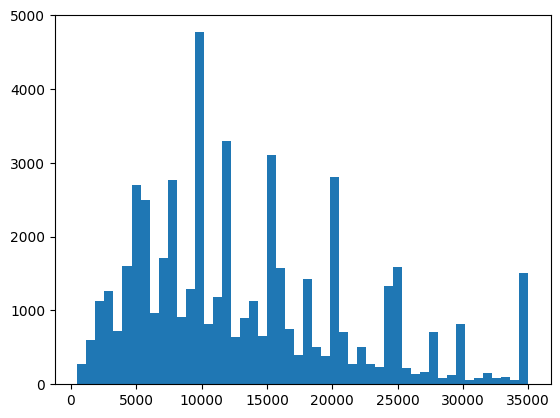

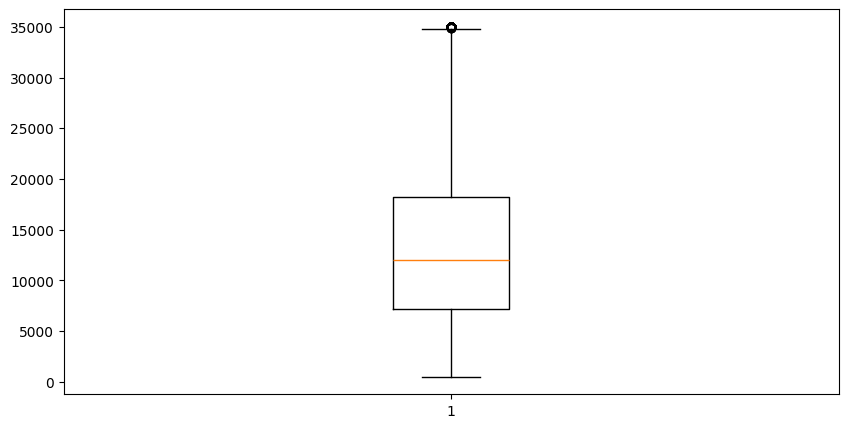

In [65]:
print(df['loan_amount'].describe())
print(f"Skew of loan_amount is {df['loan_amount'].skew()}")
graph.histogram('loan_amount', 50)
graph.boxplot('loan_amount')

Exploration of annual_inc as skew is 8.7. I wanted to see if the data in this column is skewed due to a couple or several outliers.

Skew of loan_amount is 8.790983245220485


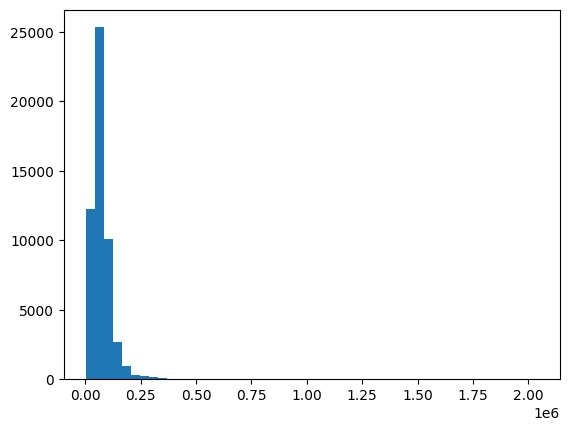

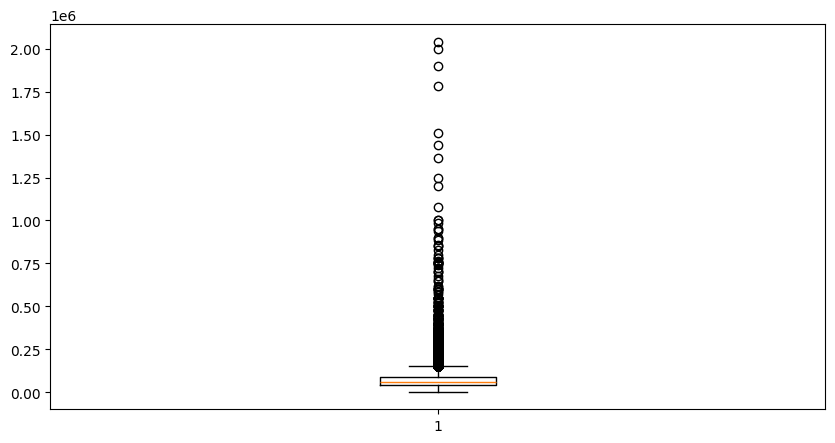

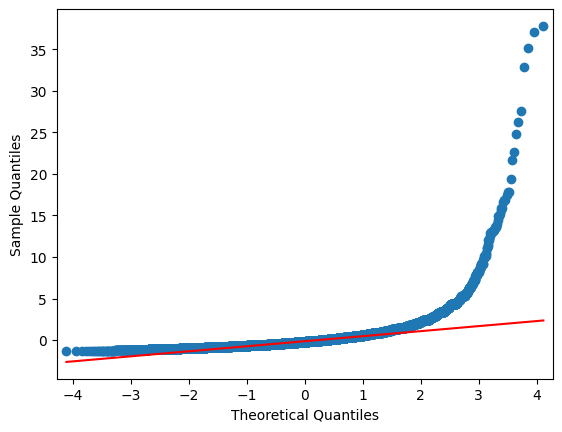

In [66]:
print(f"Skew of loan_amount is {df['annual_inc'].skew()}")
graph.histogram('annual_inc', 50)
graph.boxplot('annual_inc')
graph.qqplot('annual_inc')

I have decided to not use a log transformation to reduce the amount of skew, as naturally there would be a large range in the values in this column as it is related to the annual income of each customer.


count    51986.000000
mean         0.243008
std          0.706380
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         18.000000
Name: delinq_2yrs, dtype: float64
Skew of delinq_2yrs is 5.275736985639616


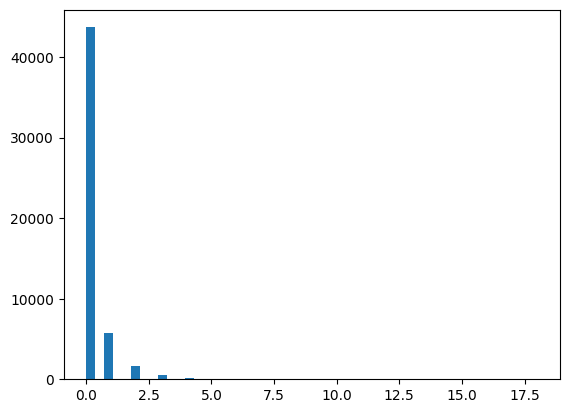

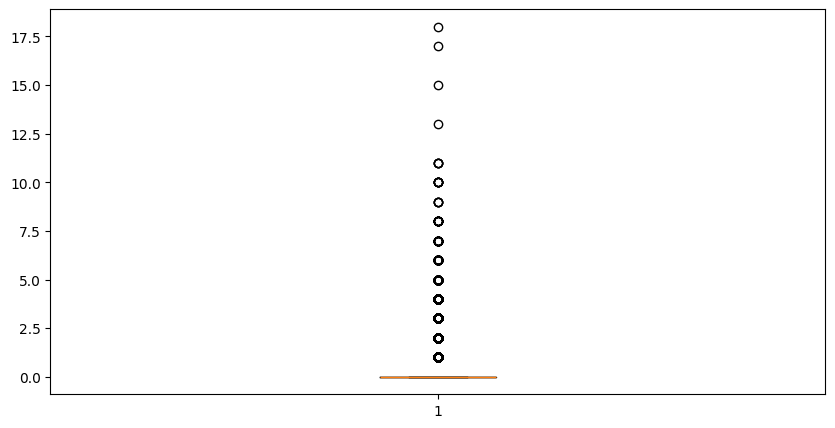

delinq_2yrs
0     43694
1      5744
2      1631
3       510
4       205
5        90
6        52
7        26
8        15
10        7
9         4
11        4
17        1
15        1
13        1
18        1
Name: count, dtype: int64

In [67]:
new_df = df
new_graph = Plotter(new_df)
print(new_df['delinq_2yrs'].describe())
print(f"Skew of delinq_2yrs is {new_df['delinq_2yrs'].skew()}")
new_graph.histogram('delinq_2yrs', 50)
graph.boxplot('delinq_2yrs')
data.distinct_values(df['delinq_2yrs'])

The delinq_2yrs column represents the number of 30+ days past-due payments in the borrower's credit file for the past 2 years. As clearly shown in the description of the data above, at least 75% of the customers (84%) do not have any days that are past-due payments in their credit file. Therefore, naturally, there will be a high amount of skew/anomalous data points.

count    51986.000000
mean         0.895318
std          1.262387
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         33.000000
Name: inq_last_6mths, dtype: float64
Skew of inq_last_6mths is 3.279658380360404


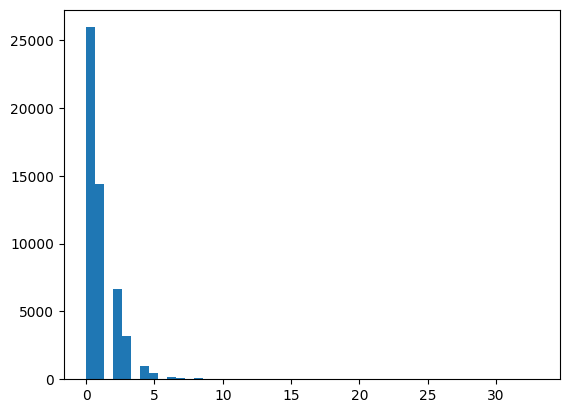

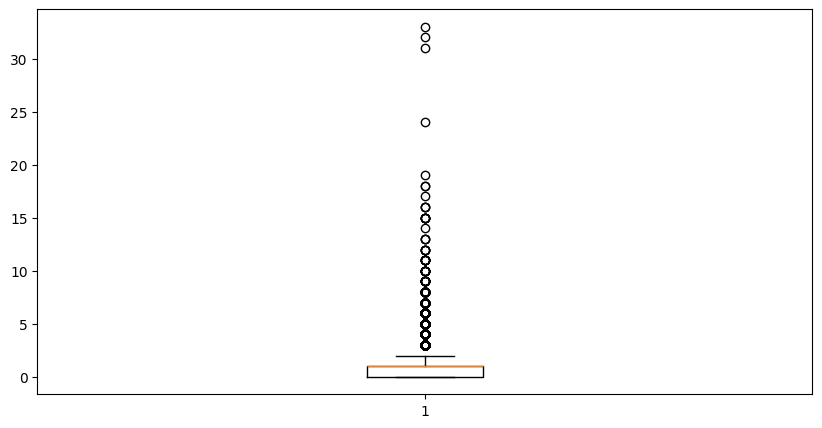

inq_last_6mths
0     25937
1     14390
2      6630
3      3163
4       999
5       444
6       200
7        96
8        64
9        17
10       11
11        9
15        6
12        5
13        3
16        3
18        2
17        1
33        1
24        1
31        1
32        1
19        1
14        1
Name: count, dtype: int64

In [68]:
print(new_df['inq_last_6mths'].describe())
print(f"Skew of inq_last_6mths is {new_df['inq_last_6mths'].skew()}")
new_graph.histogram('inq_last_6mths', 50)
graph.boxplot('inq_last_6mths')
data.distinct_values(df['inq_last_6mths'])
data.distinct_values(df['inq_last_6mths'])

It is clear from the boxplots and the description of this column that there are some high anomalous points of data that are causing the skew value to be above 1. Below, I have removed all rows where the inq_last_6mths >10 as this will drop <1% of the data and should have an impact on the skew value.

count    51951.000000
mean         0.885488
std          1.195144
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         10.000000
Name: inq_last_6mths, dtype: float64
The new skewness for the inq_last_6mths column is 1.9323988642403955


<function matplotlib.pyplot.show(close=None, block=None)>

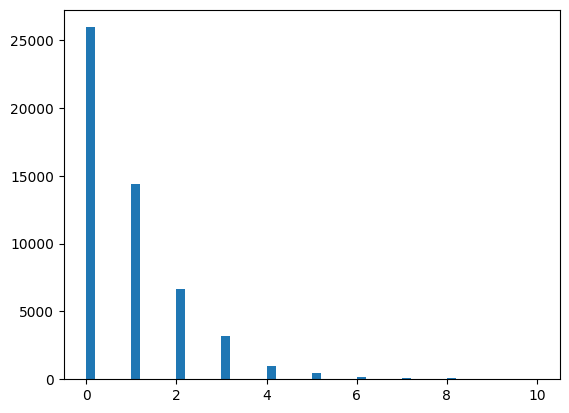

In [69]:
new_df = new_df.drop(new_df[new_df.inq_last_6mths > 10].index)
print(new_df['inq_last_6mths'].describe())
print(f'The new skewness for the inq_last_6mths column is {new_df['inq_last_6mths'].skew()}')

data.distinct_values(new_df['inq_last_6mths'])
new_graph = Plotter(new_df)
new_graph.histogram('inq_last_6mths', 50)


count    51951.000000
mean        10.599911
std          4.804836
min          1.000000
25%          7.000000
50%         10.000000
75%         13.000000
max         53.000000
Name: open_accounts, dtype: float64
Skew of open_accounts is 1.058213081654687


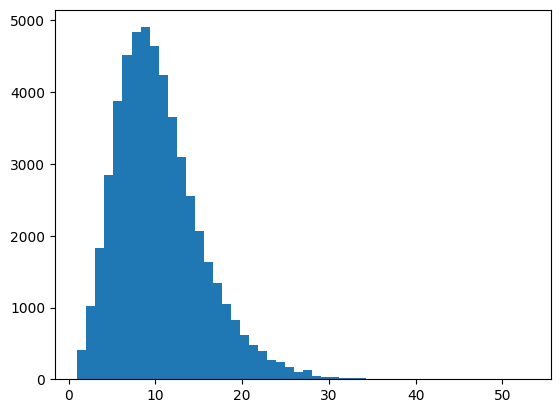

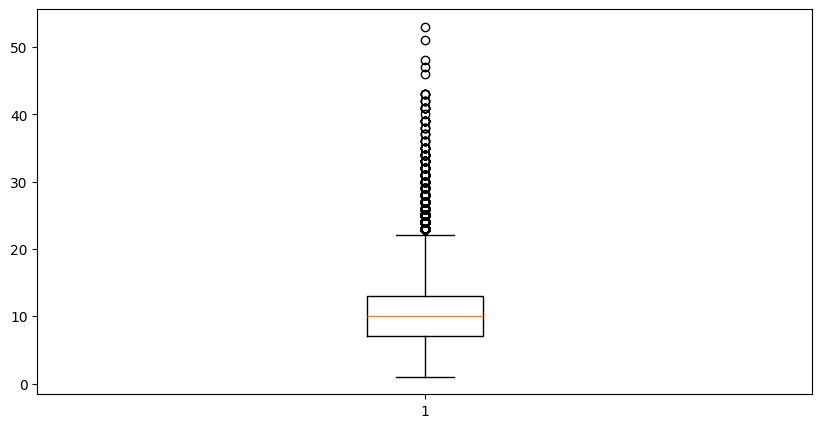

In [70]:
print(new_df['open_accounts'].describe())
print(f"Skew of open_accounts is {new_df['open_accounts'].skew()}")
new_graph.histogram('open_accounts', 50)
new_graph.boxplot('open_accounts')


count    51934.000000
mean        10.588978
std          4.767020
min          1.000000
25%          7.000000
50%         10.000000
75%         13.000000
max         40.000000
Name: open_accounts, dtype: float64
The new skewness for the open_accounts column is 0.9741390164690347


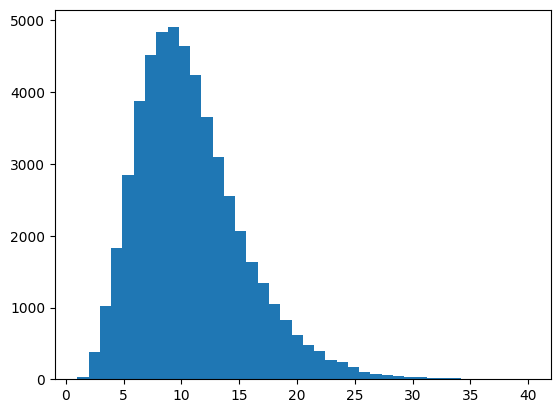

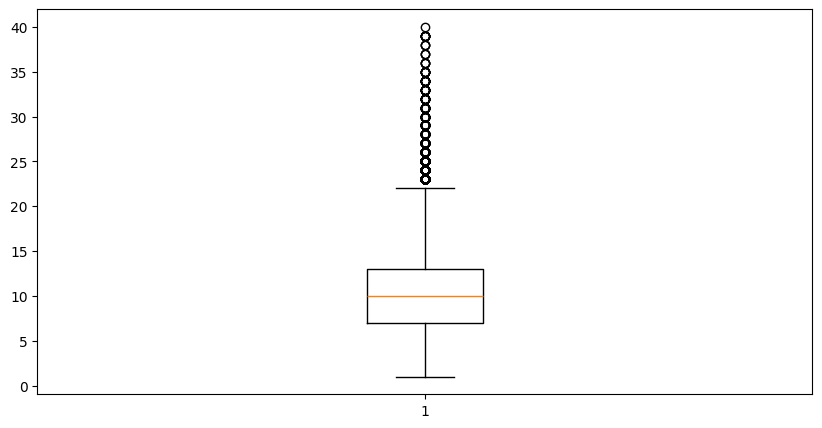

In [71]:
new_df = new_df.drop(new_df[new_df.open_accounts > 40].index)
print(new_df['open_accounts'].describe())
print(f'The new skewness for the open_accounts column is {new_df['open_accounts'].skew()}')

data.distinct_values(new_df['open_accounts'])
new_graph = Plotter(new_df)
new_graph.histogram('open_accounts', 40)
new_graph.boxplot('open_accounts')

count    51934.000000
mean        24.205703
std         11.549328
min          1.000000
25%         16.000000
50%         23.000000
75%         31.000000
max         90.000000
Name: total_accounts, dtype: float64
Skew of total_accounts is 0.7636910857745737


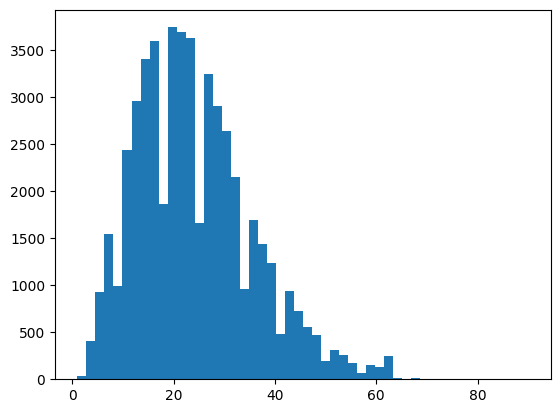

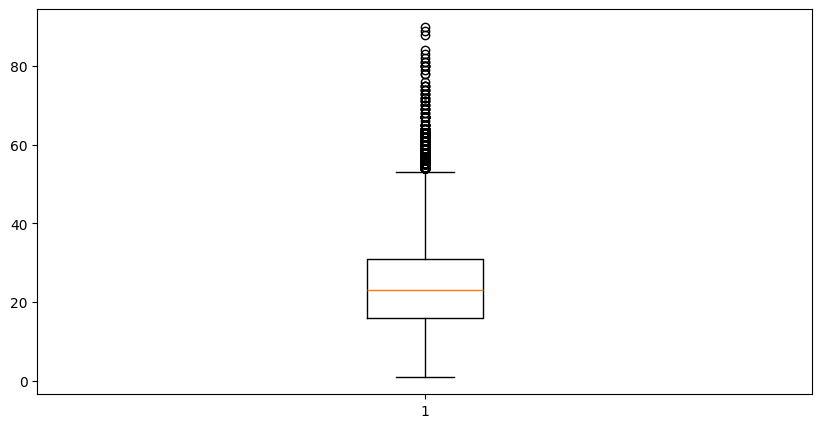

In [72]:
print(new_df['total_accounts'].describe())
print(f"Skew of total_accounts is {new_df['total_accounts'].skew()}")
new_graph.histogram('total_accounts', 50)
new_graph.boxplot('total_accounts')

count    51926.000000
mean        24.196376
std         11.525660
min          1.000000
25%         16.000000
50%         23.000000
75%         31.000000
max         80.000000
Name: total_accounts, dtype: float64
The new skewness for the total_accounts column is 0.7483987833835097


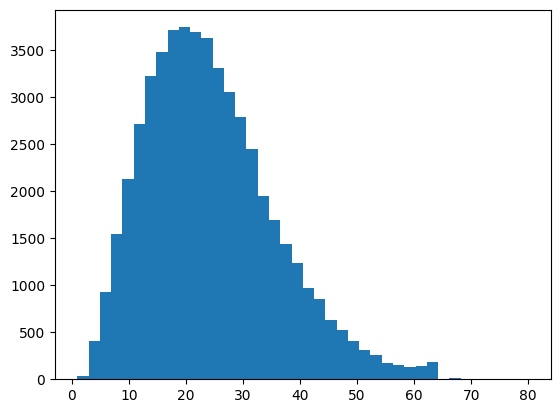

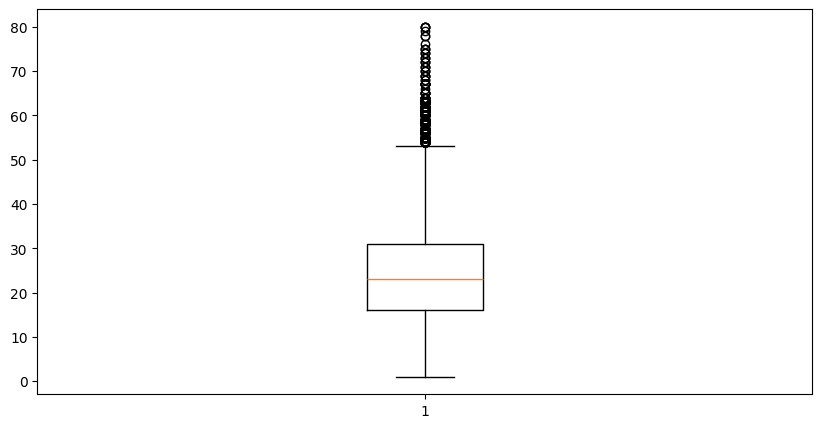

In [73]:
new_df = new_df.drop(new_df[new_df.total_accounts > 80].index)
print(new_df['total_accounts'].describe())
print(f'The new skewness for the total_accounts column is {new_df['total_accounts'].skew()}')

data.distinct_values(new_df['total_accounts'])
new_graph = Plotter(new_df)
new_graph.histogram('total_accounts', 40)
new_graph.boxplot('total_accounts')

count    51926.000000
mean     13259.068675
std       7812.871510
min        500.000000
25%       7500.000000
50%      12000.000000
75%      18000.000000
max      35000.000000
Name: funded_amount, dtype: float64
Skew of funded_amount is 0.8633026489695957


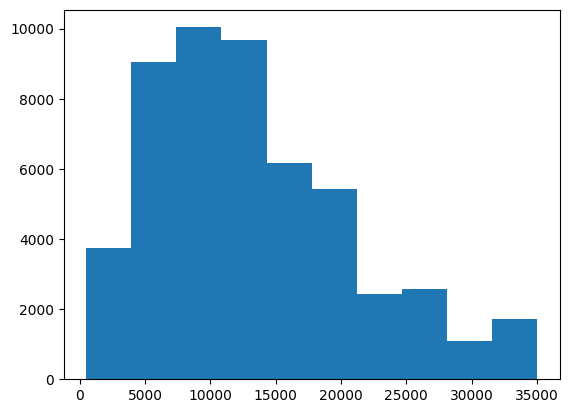

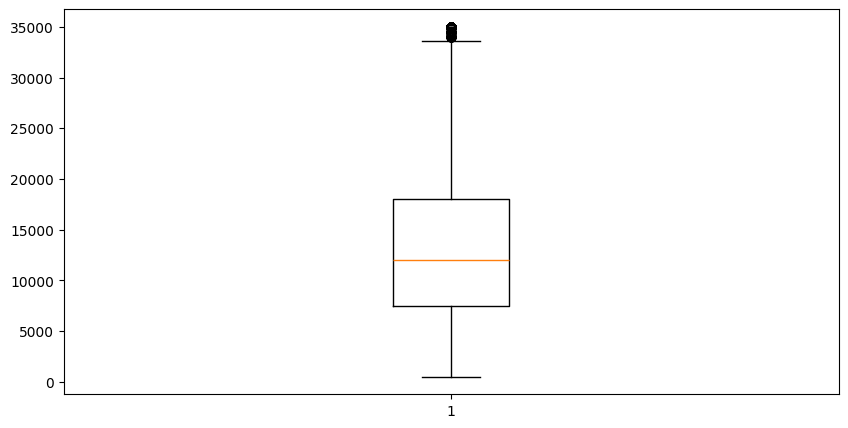

In [74]:
print(new_df['funded_amount'].describe())
print(f"Skew of funded_amount is {new_df['funded_amount'].skew()}")
new_graph.histogram('funded_amount', 10)
new_graph.boxplot('funded_amount')

count    51926.000000
mean     13056.186934
std       8112.248141
min          0.000000
25%       6966.332776
50%      11500.000000
75%      18000.000000
max      35000.000000
Name: funded_amount_inv, dtype: float64
Skew of funded_amount_inv is 0.8064721112075988


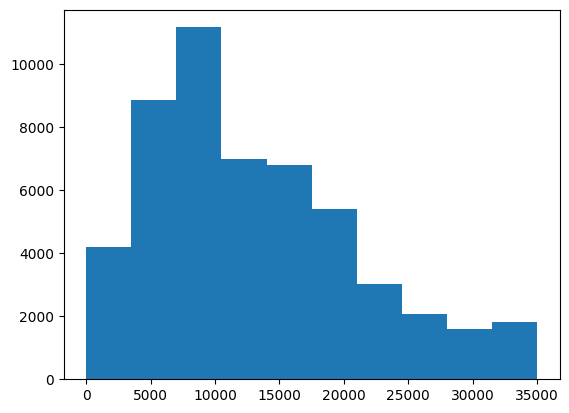

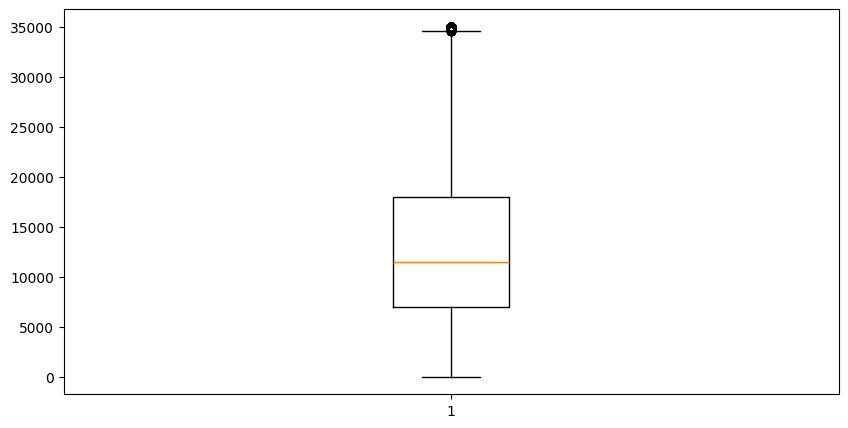

In [75]:
print(new_df['funded_amount_inv'].describe())
print(f"Skew of funded_amount_inv is {new_df['funded_amount_inv'].skew()}")
new_graph.histogram('funded_amount_inv', 10)
new_graph.boxplot('funded_amount_inv')

For the term_months column there are only two values that are used, 36 and 60 months. It is clear that there would be a skew value larger than 1 and therefore no need to correct this value.

In [76]:
print(new_df['term_months'].describe())
print(f"Skew of term_months is {new_df['term_months'].skew()}")
data.distinct_values(df['term_months'])

count    51926.000000
mean        42.100065
std         10.449539
min         36.000000
25%         36.000000
50%         36.000000
75%         60.000000
max         60.000000
Name: term_months, dtype: float64
Skew of term_months is 1.129267329392523


term_months
36.0    38782
60.0    13204
Name: count, dtype: int64

count    51926.000000
mean        13.516838
std          4.177587
min          5.420000
25%         10.650000
50%         13.516927
75%         15.880000
max         26.060000
Name: int_rate, dtype: float64
Skew of int_rate is 0.43765917719553404


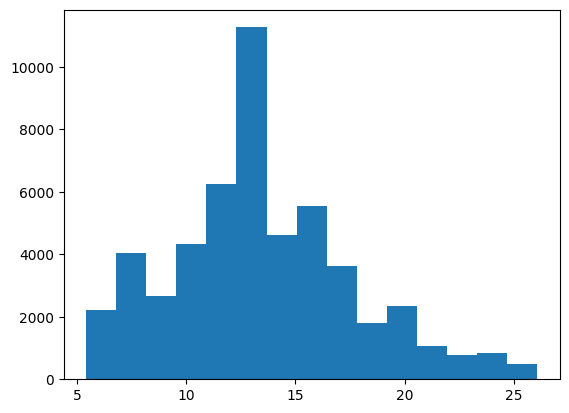

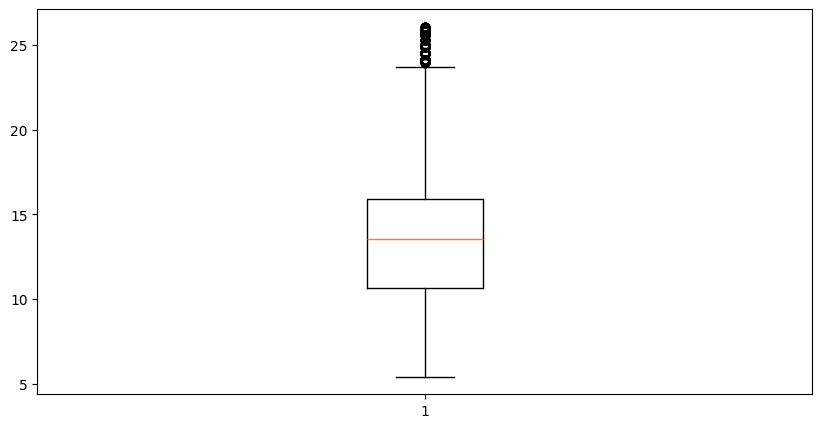

In [77]:
print(new_df['int_rate'].describe())
print(f"Skew of int_rate is {new_df['int_rate'].skew()}")
new_graph.histogram('int_rate', 15)
new_graph.boxplot('int_rate')

count    51926.000000
mean       402.828552
std        239.308437
min         15.670000
25%        227.980000
50%        349.650000
75%        530.605000
max       1407.010000
Name: instalment, dtype: float64
Skew of instalment is 0.9889974242395855


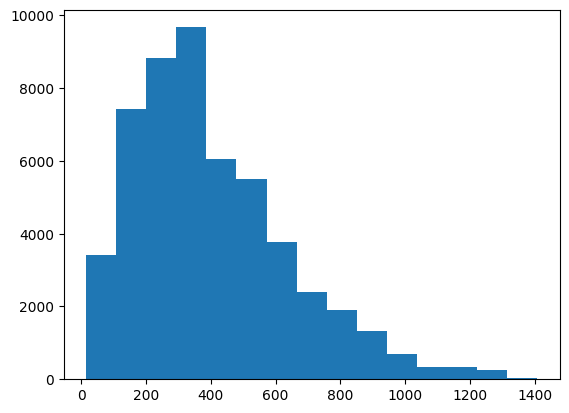

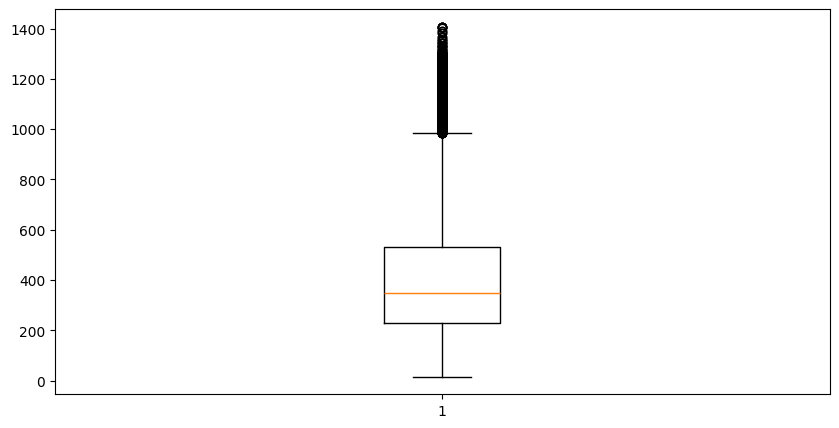

In [78]:
print(new_df['instalment'].describe())
print(f"Skew of instalment is {new_df['instalment'].skew()}")
new_graph.histogram('instalment', 15)
new_graph.boxplot('instalment')

count    51926.000000
mean        15.827212
std          7.596191
min          0.000000
25%         10.190000
50%         15.550000
75%         21.200000
max         39.910000
Name: dti, dtype: float64
Skew of dti is 0.19442837389360382


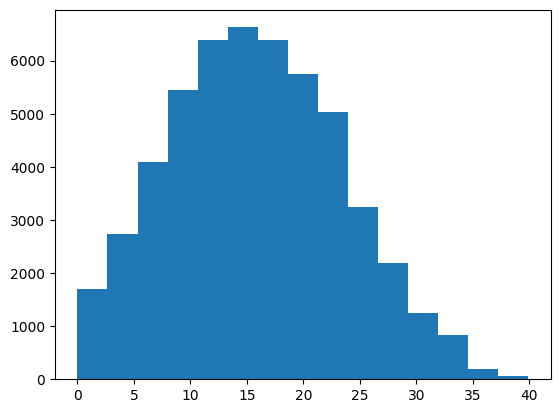

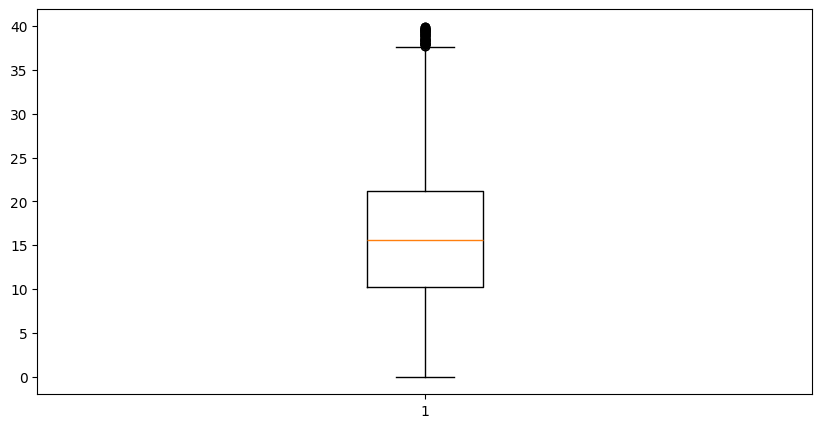

In [79]:
print(new_df['dti'].describe())
print(f"Skew of dti is {new_df['dti'].skew()}")
new_graph.histogram('dti', 15)
new_graph.boxplot('dti')

count    51926.000000
mean      2757.845444
std       5180.595956
min          0.000000
25%          0.000000
50%          0.000000
75%       3384.780000
max      32399.940000
Name: out_prncp, dtype: float64
Skew of out_prncp is 2.3536941778022347


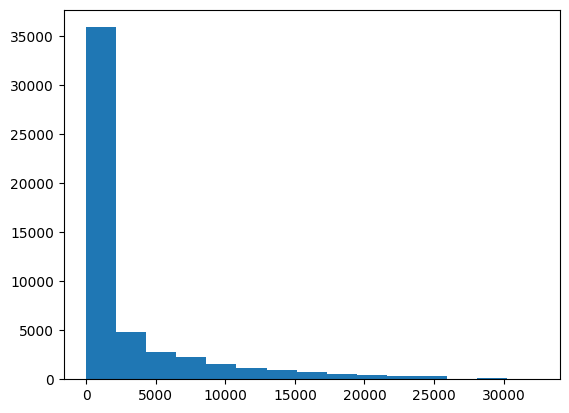

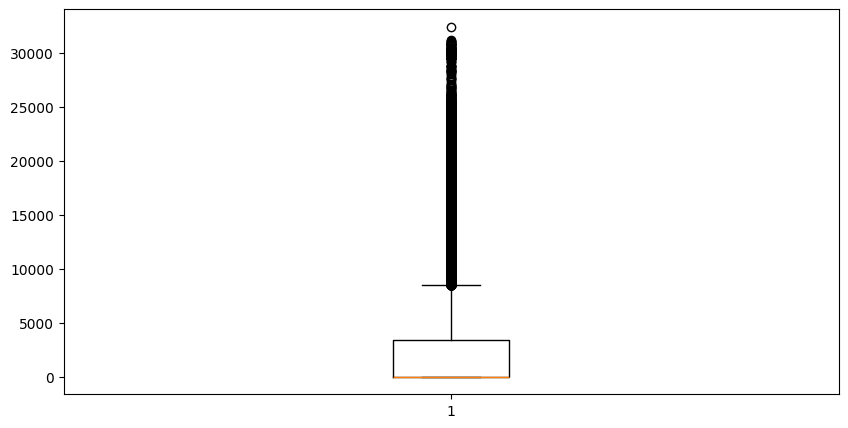

In [80]:
print(new_df['out_prncp'].describe())
print(f"Skew of out_prncp is {new_df['out_prncp'].skew()}")
new_graph.histogram('out_prncp', 15)
new_graph.boxplot('out_prncp')


count    51926.000000
mean      2756.426066
std       5178.738195
min          0.000000
25%          0.000000
50%          0.000000
75%       3384.647500
max      32399.940000
Name: out_prncp_inv, dtype: float64
Skew of out_prncp_inv is 2.3541335571320916


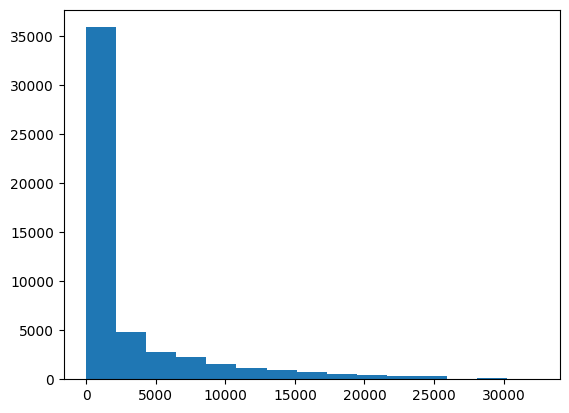

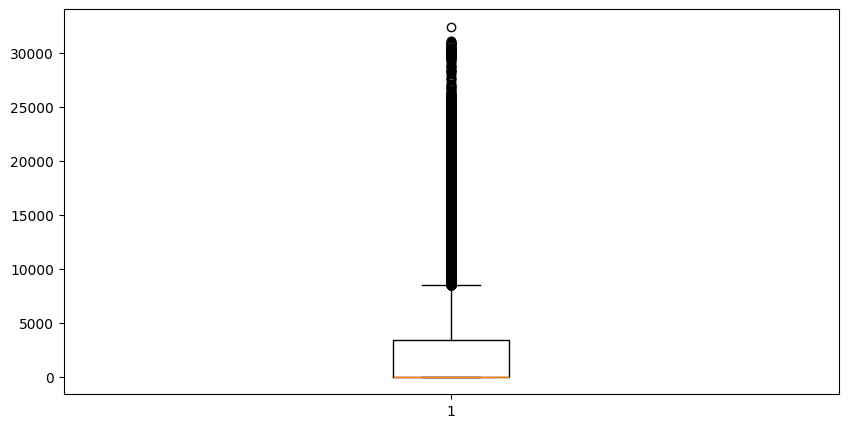

In [81]:
print(new_df['out_prncp_inv'].describe())
print(f"Skew of out_prncp_inv is {new_df['out_prncp_inv'].skew()}")
new_graph.histogram('out_prncp_inv', 15)
new_graph.boxplot('out_prncp_inv')

count    51926.000000
mean     12212.175810
std       8414.804264
min         33.730000
25%       6007.070000
50%      10249.683311
75%      16421.699625
max      55758.222084
Name: total_payment, dtype: float64
Skew of total_payment is 1.258750103591681


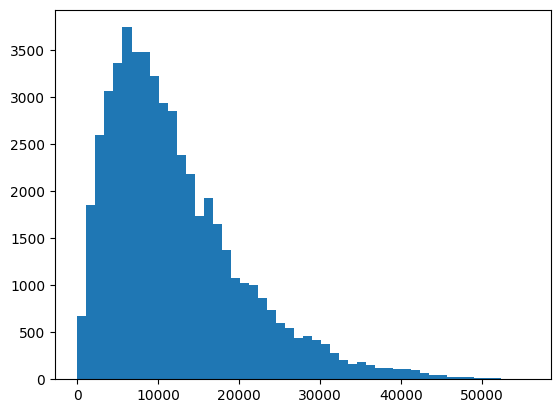

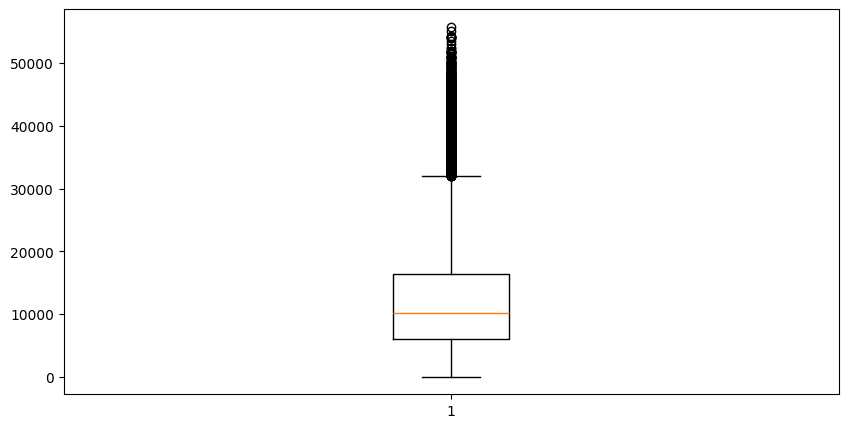

In [82]:
print(new_df['total_payment'].describe())
print(f"Skew of total_payment is {new_df['total_payment'].skew()}")
new_graph.histogram('total_payment', 50)
new_graph.boxplot('total_payment')

count    51926.000000
mean     11921.346699
std       8386.815445
min          0.000000
25%       5764.135000
50%       9973.110000
75%      16131.670000
max      55061.000000
Name: total_payment_inv, dtype: float64
Skew of total_payment_inv is 1.2476831187482087


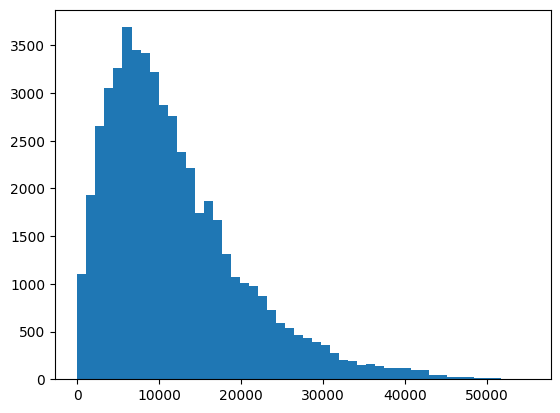

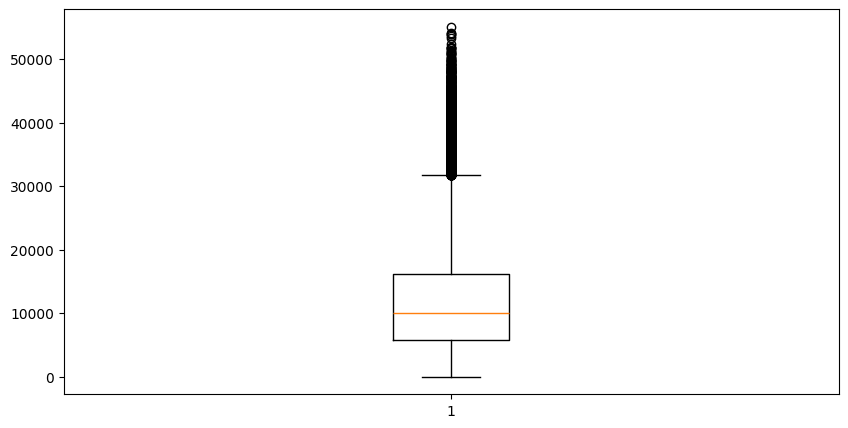

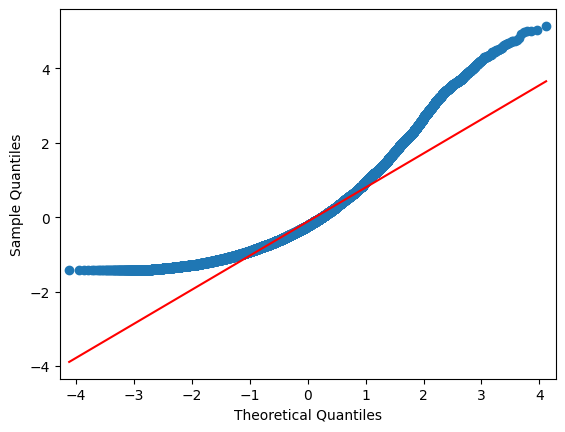

In [83]:
print(new_df['total_payment_inv'].describe())
print(f"Skew of total_payment_inv is {new_df['total_payment_inv'].skew()}")
new_graph.histogram('total_payment_inv', 50)
new_graph.boxplot('total_payment_inv')
new_graph.qqplot('total_payment_inv')

count    51926.000000
mean      9513.364448
std       6982.021051
min          0.000000
25%       4366.912500
50%       7802.340000
75%      12800.000000
max      35000.020000
Name: total_rec_prncp, dtype: float64
Skew of total_rec_prncp is 1.249664974766879


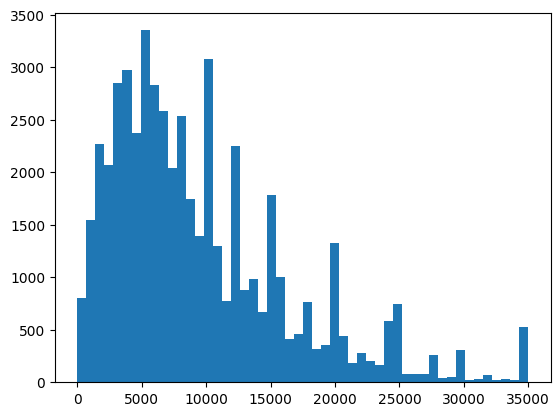

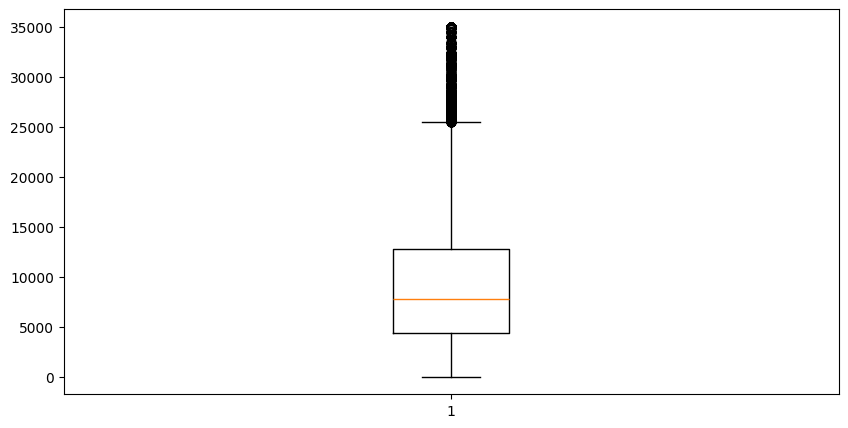

In [84]:
print(new_df['total_rec_prncp'].describe())
print(f"Skew of total_rec_prncp is {new_df['total_rec_prncp'].skew()}")
new_graph.histogram('total_rec_prncp', 50)
new_graph.boxplot('total_rec_prncp')


count    51926.000000
mean      2605.385637
std       2598.183859
min          6.220000
25%        901.885000
50%       1756.275000
75%       3358.022500
max      23062.450000
Name: total_rec_int, dtype: float64
Skew of total_rec_int is 2.1932908251792416


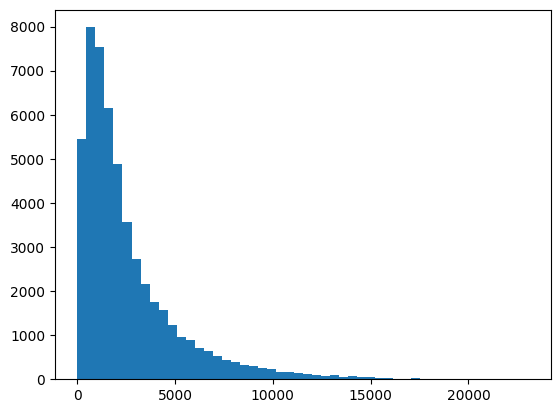

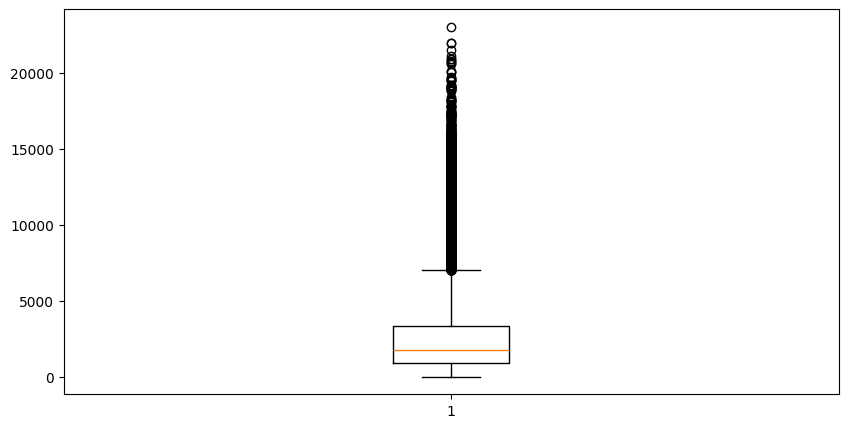

In [85]:
print(new_df['total_rec_int'].describe())
print(f"Skew of total_rec_int is {new_df['total_rec_int'].skew()}")
new_graph.histogram('total_rec_int', 50)
new_graph.boxplot('total_rec_int')

I decided to use as Box-Cox transformation instead of a log transformation, as the values still stay positive. When I applied a log transformation to the data, it began to create negative values of data, which would not feasible for a column that shares the interest received to date.

count    51867.000000
mean        14.731016
std          3.391103
min          2.130728
25%         12.501890
50%         14.649390
75%         16.973213
max         25.531785
Name: total_rec_int, dtype: float64
Skew of total_rec_int is 0.0013755908320452833


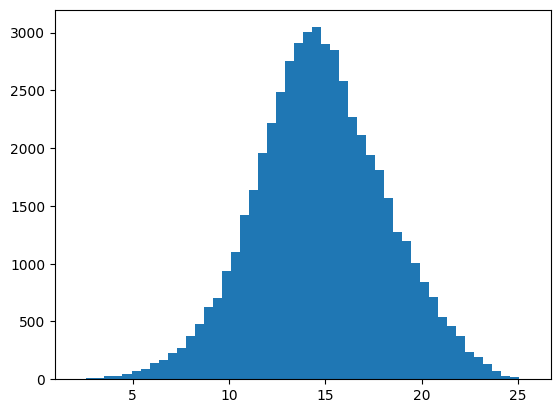

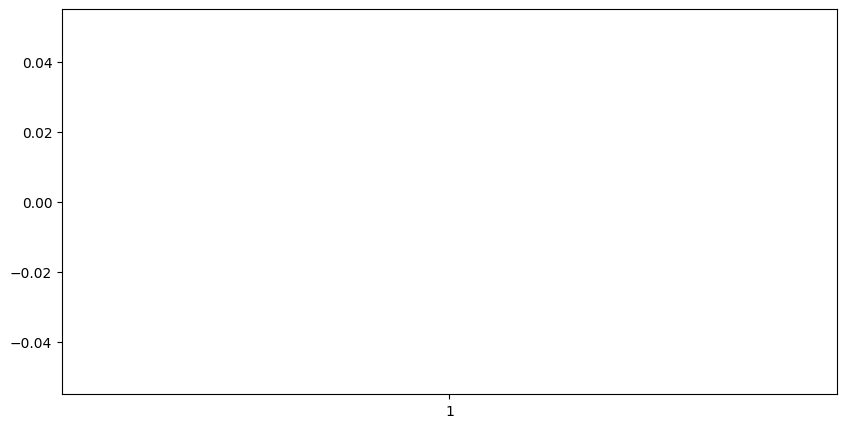

In [86]:
from scipy import stats
boxcox_total_rec_int = new_df["total_rec_int"]
boxcox_total_rec_int= stats.boxcox(boxcox_total_rec_int)
boxcox_total_rec_int= pd.Series(boxcox_total_rec_int[0])
new_df['total_rec_int'] = boxcox_total_rec_int
print(new_df['total_rec_int'].describe())
print(f"Skew of total_rec_int is {new_df['total_rec_int'].skew()}")
new_graph.histogram('total_rec_int', 50)
new_graph.boxplot('total_rec_int')

count    51926.000000
mean         0.904707
std          6.231349
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        358.680000
Name: total_rec_late_fee, dtype: float64
Skew of total_rec_late_fee is 13.299295357109798


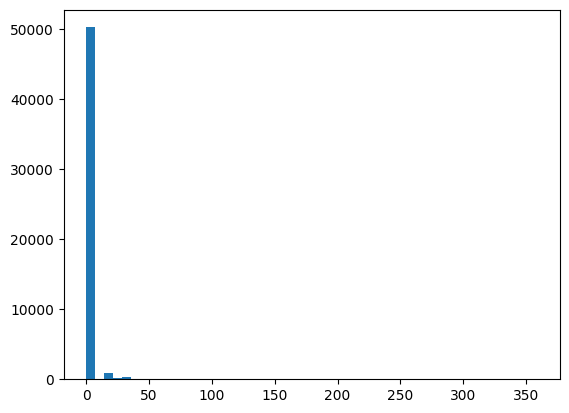

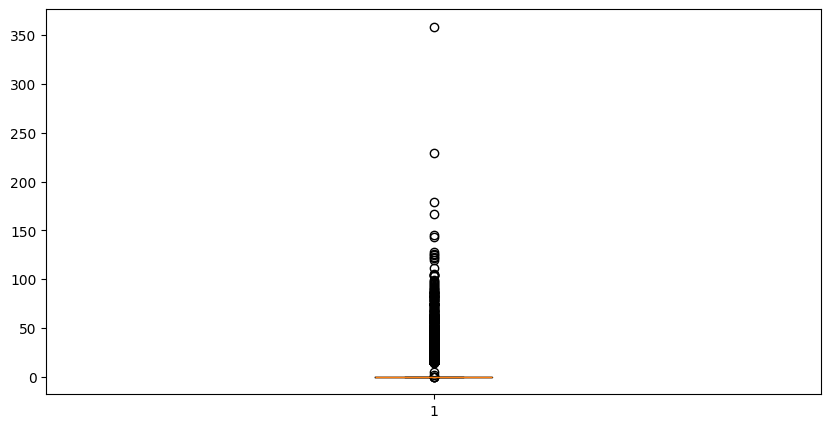

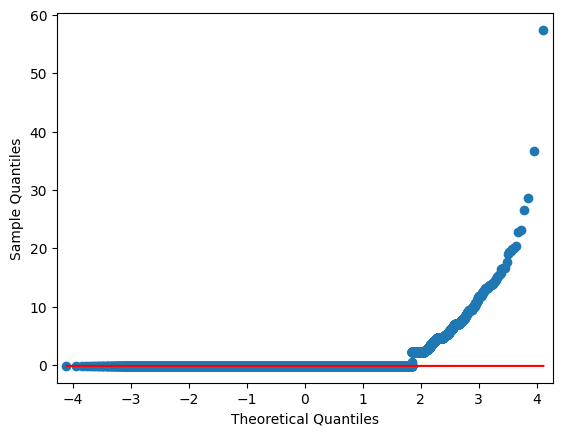

In [87]:
print(new_df['total_rec_late_fee'].describe())
print(f"Skew of total_rec_late_fee is {new_df['total_rec_late_fee'].skew()}")
new_graph.histogram('total_rec_late_fee', 50)
new_graph.boxplot('total_rec_late_fee')
new_graph.qqplot('total_rec_late_fee')

count    51766.000000
mean         0.669962
std          4.185602
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         49.980000
Name: total_rec_late_fee, dtype: float64
The new skewness for the total_rec_late_fee column is 7.172335135698487


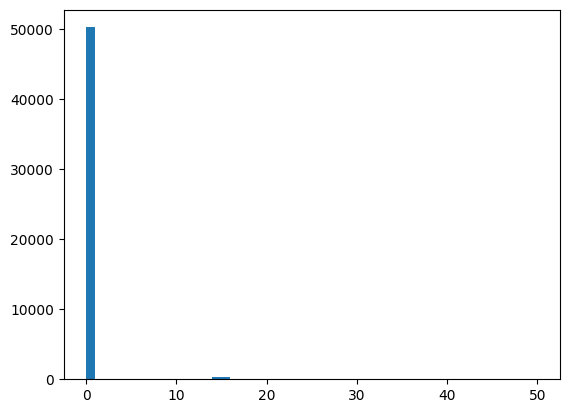

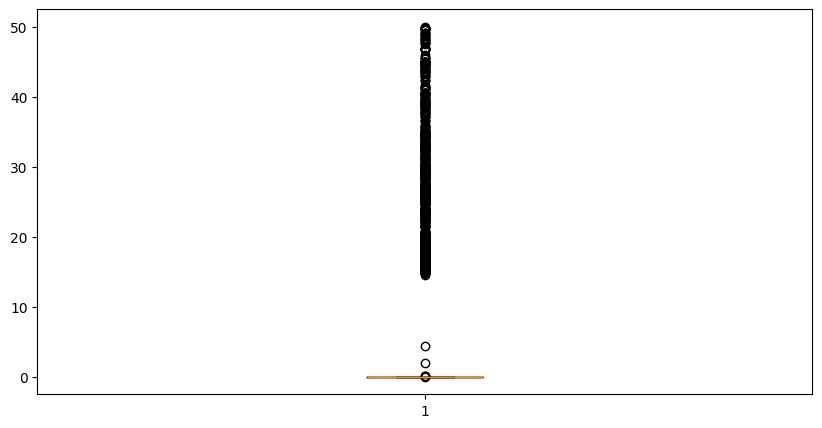

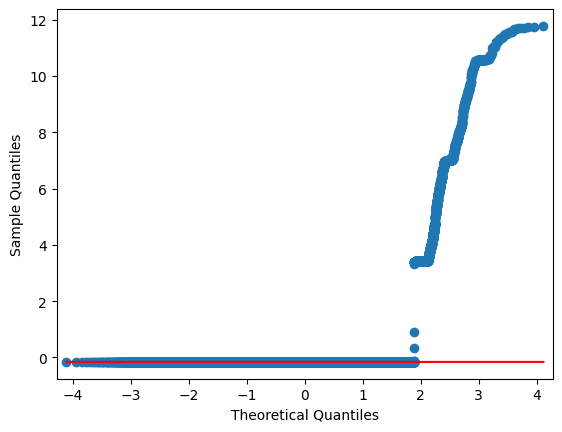

In [88]:
new_df = new_df.drop(new_df[new_df.total_rec_late_fee > 50].index)
print(new_df['total_rec_late_fee'].describe())
print(f'The new skewness for the total_rec_late_fee column is {new_df['total_rec_late_fee'].skew()}')

data.distinct_values(new_df['total_rec_late_fee'])
new_graph = Plotter(new_df)
new_graph.histogram('total_rec_late_fee', 50)
new_graph.boxplot('total_rec_late_fee')
new_graph.qqplot('total_rec_late_fee')

count    51766.000000
mean        89.749585
std        591.101960
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      22943.370000
Name: recoveries, dtype: float64
Skew of recoveries is 12.931534528034334


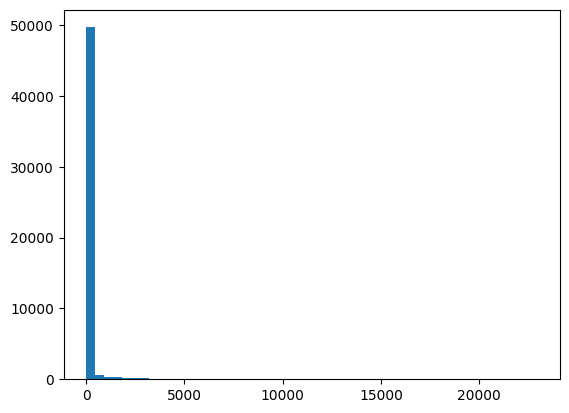

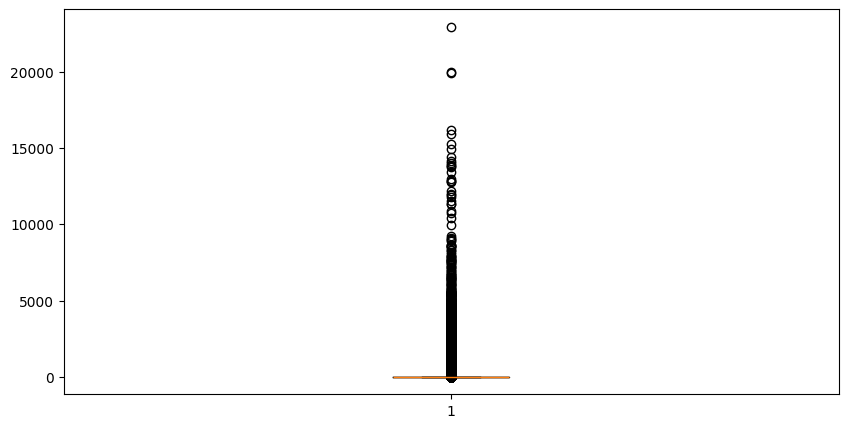

In [89]:
print(new_df['recoveries'].describe())
print(f"Skew of recoveries is {new_df['recoveries'].skew()}")
new_graph.histogram('recoveries', 50)
new_graph.boxplot('recoveries')

count    51766.000000
mean        10.166485
std        110.565791
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       7002.190000
Name: collection_recovery_fee, dtype: float64
Skew of collection_recovery_fee is 28.193838911273087


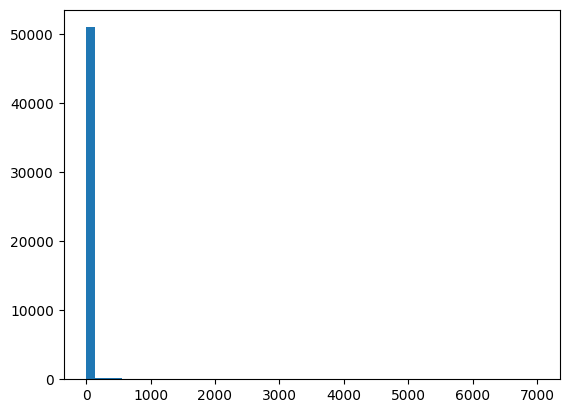

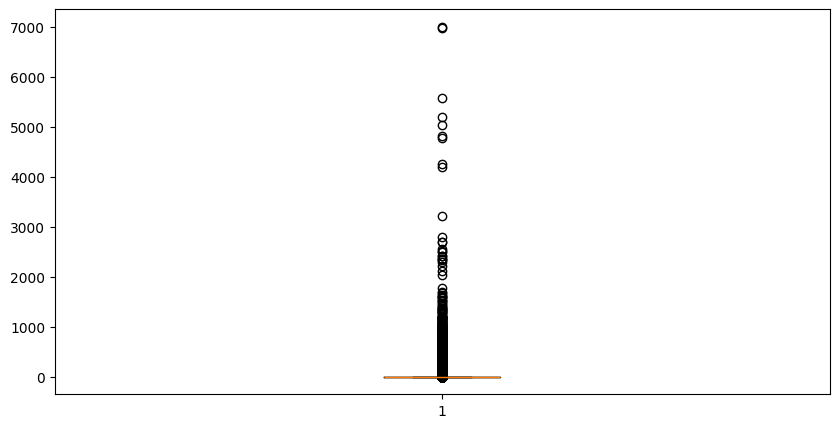

In [90]:
print(new_df['collection_recovery_fee'].describe())
print(f"Skew of collection_recovery_fee is {new_df['collection_recovery_fee'].skew()}")
new_graph.histogram('collection_recovery_fee', 50)
new_graph.boxplot('collection_recovery_fee')


In [91]:
(new_df['collection_recovery_fee'] > 0).sum()/51680 * 100

6.178405572755418

From the description of the data, only 6% of all the customers that have had a post charge off collection fee and therefore unwise to drop these columns just to fit the trend of the data in this column.

count    51766.000000
mean      3184.630089
std       5372.599368
min          0.000000
25%        294.285000
50%        572.040000
75%       3869.487500
max      36115.200000
Name: last_payment_amount, dtype: float64
Skew of last_payment_amount is 2.472082835380983


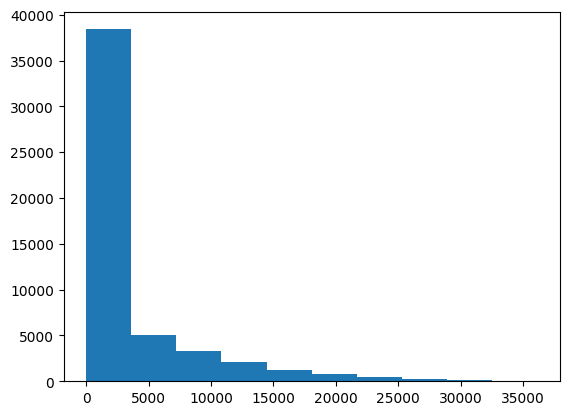

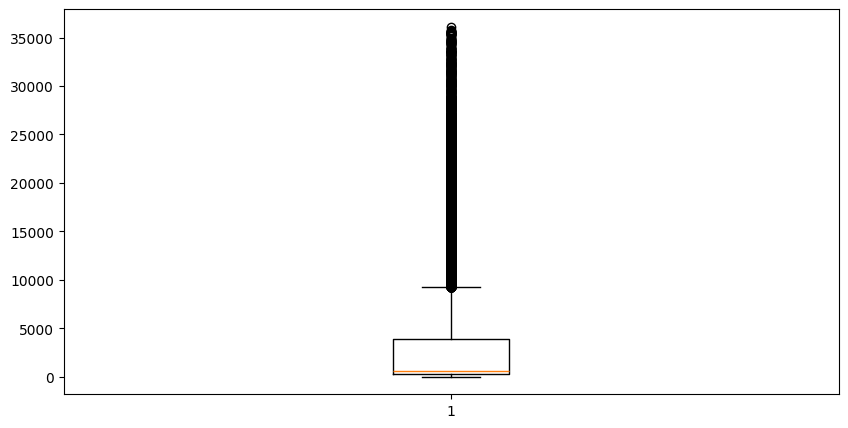

In [92]:
print(new_df['last_payment_amount'].describe())
print(f"Skew of last_payment_amount is {new_df['last_payment_amount'].skew()}")
new_graph.histogram('last_payment_amount', 10)
new_graph.boxplot('last_payment_amount')

count    51766.000000
mean         0.004192
std          0.070883
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: collections_12_mths_ex_med, dtype: float64
Skew of collections_12_mths_ex_med is 20.380696200044188


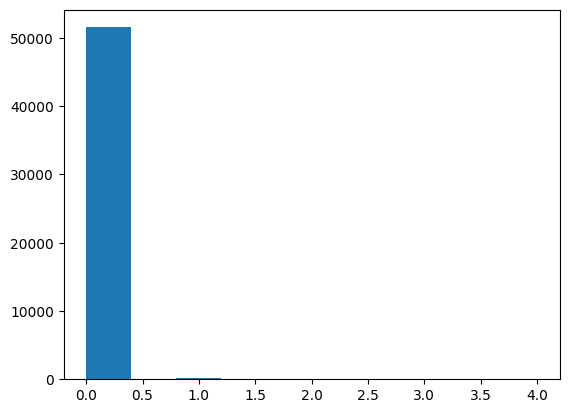

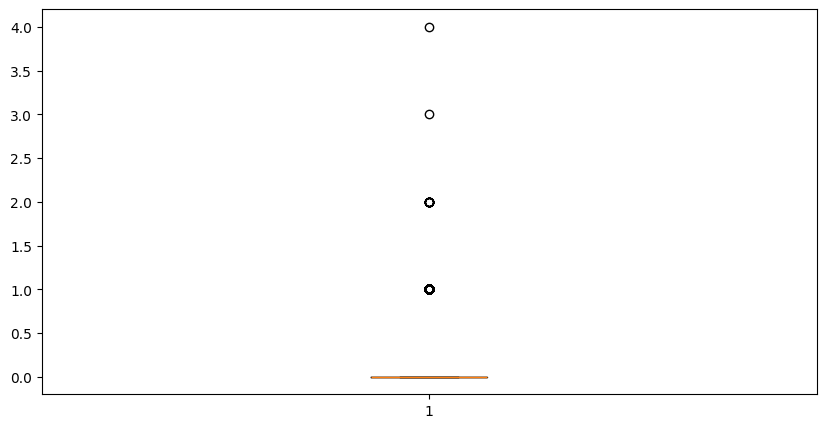

In [93]:
print(new_df['collections_12_mths_ex_med'].describe())
print(f"Skew of collections_12_mths_ex_med is {new_df['collections_12_mths_ex_med'].skew()}")
new_graph.histogram('collections_12_mths_ex_med', 10)
new_graph.boxplot('collections_12_mths_ex_med')

count    51567.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: collections_12_mths_ex_med, dtype: float64
The new skewness for the collections_12_mths_ex_med column is 0.0


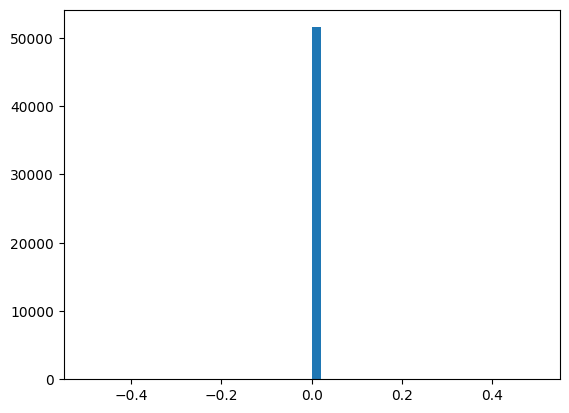

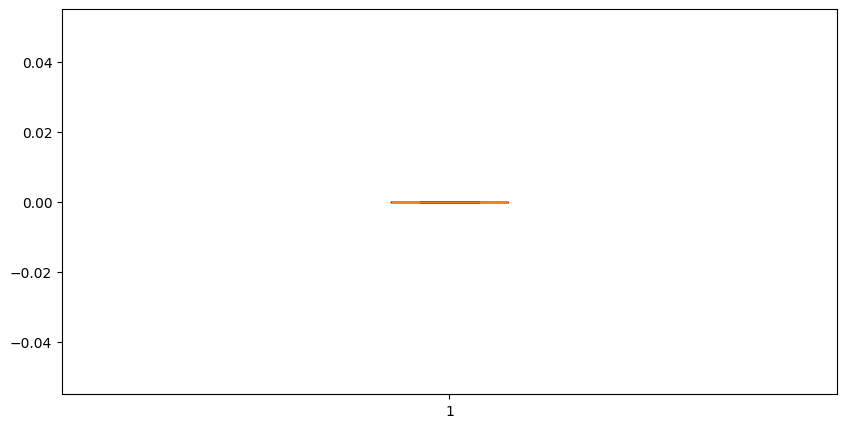

In [94]:
(df['collections_12_mths_ex_med'] > 0).sum()
new_df = new_df.drop(new_df[new_df.collections_12_mths_ex_med > 0].index)
print(new_df['collections_12_mths_ex_med'].describe())
print(f'The new skewness for the collections_12_mths_ex_med column is {new_df['collections_12_mths_ex_med'].skew()}')

new_graph = Plotter(new_df)
new_graph.histogram('collections_12_mths_ex_med', 50)
new_graph.boxplot('collections_12_mths_ex_med')

In [95]:
print(f"{new_df.select_dtypes(include='float64').skew()}")

funded_amount                  0.865422
funded_amount_inv              0.808844
term_months                    1.130296
int_rate                       0.436246
instalment                     0.988362
annual_inc                     8.864757
dti                            0.193673
out_prncp                      2.357682
out_prncp_inv                  2.358114
total_payment                  1.259511
total_payment_inv              1.247945
total_rec_prncp                1.249499
total_rec_int                  0.001717
total_rec_late_fee             7.176510
recoveries                    12.944535
collection_recovery_fee       28.202494
last_payment_amount            2.472058
collections_12_mths_ex_med     0.000000
dtype: float64


In [96]:
print(f"{new_df.select_dtypes(include='int64').skew()}")

id                2.403966
member_id         2.233758
loan_amount       0.799465
delinq_2yrs       5.286139
inq_last_6mths    1.924822
open_accounts     0.969292
total_accounts    0.749785
policy_code       0.000000
dtype: float64


In [97]:
new_df.to_csv(r"C:\Users\harde\Documents\AiCore\Customer Loans in Finance/loan_payments_skewness_corrected.csv", index=False)

Using a Correlation Matrix, I am able to find out and drop any columns that are overly correlated, which can affect the accuracy and interpretability of models built on the data. 

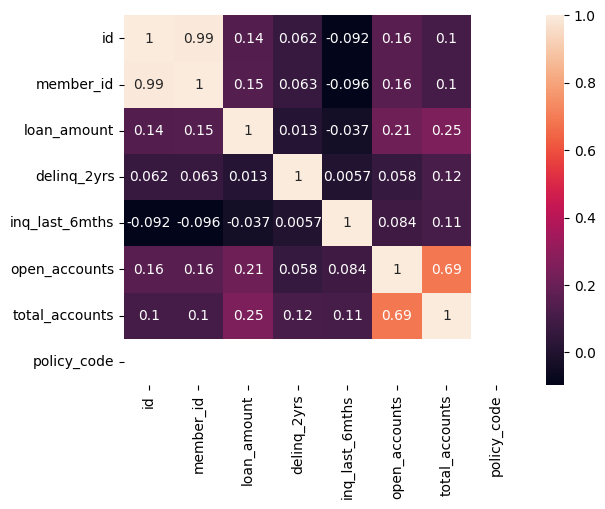

In [98]:
corrMatrix = (new_df.select_dtypes(include='int64').corr())
sns.heatmap(corrMatrix, annot = True)
plt.show()

As seen above, id and member_id are nearly identical, which means they are most likely repeat columns that are not needed.

In [99]:
new_df = new_df.drop('member_id', axis=1)


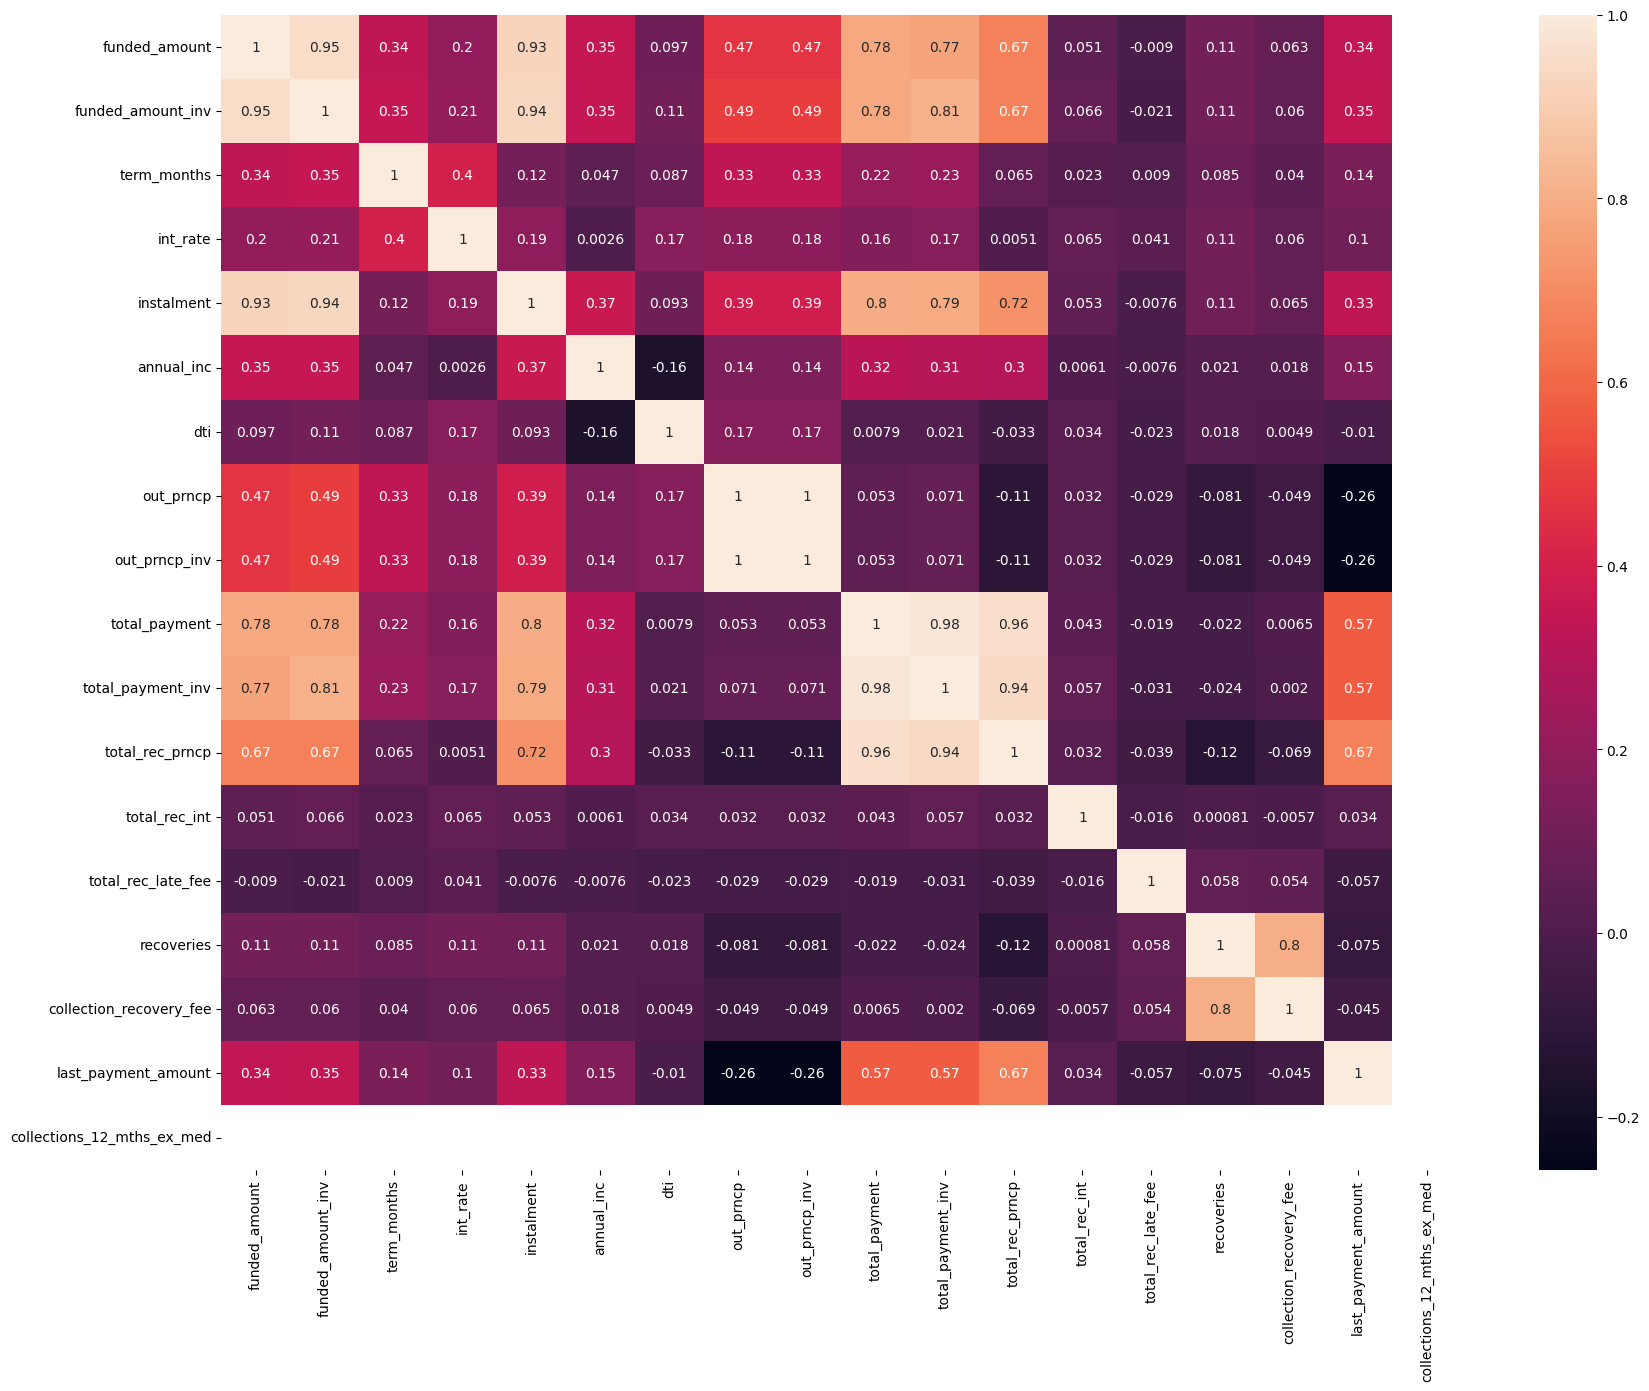

In [100]:
corrMatrix = (new_df.select_dtypes(include='float64').corr())
plt.figure(figsize=(20,15))
ax=plt.subplot(111)
sns.heatmap(corrMatrix, ax=ax,  annot = True)
plt.show()

As seen above, the following columns are deemed overly correlated:
- funded_amount and funded_amount_inv
- total_payment and total_payment_inv
- out_prncp and out_prncp_inv

In [101]:
new_df = new_df.drop('funded_amount_inv', axis=1)
new_df = new_df.drop('total_payment_inv', axis=1)
new_df = new_df.drop('out_prncp_inv', axis=1)

In [102]:
new_df.to_csv(r"C:\Users\harde\Documents\AiCore\Customer Loans in Finance/loan_payments_overly_correlated_columns_dropped.csv", index=False)

In [103]:
new_df.shape[0]/df.shape[0] *100

99.19401377293887

As seen above, the total amount of inital data that has been dropped due to its skewness and anomalies is <1%.